# Case Study Evaluation

This Jupyter notebook emphasizes the evaluation of the methodology applied to the case study. It encompasses the code for data sampling, manual feature extraction, and comparison between manual and automated feature extraction processes by drawing data visualization.

1. **Data Sampling:** Sampling reviews that have lower satisfaction ratings. This is done by setting a threshold at the 10th percentile of ratings and only picking reviews below this threshold. To make analysis more manageable, this study take a random sample that is just 1% of these lower-rated reviews.

2. **Ranking Comparison:** Comparing rankings created by running the model with manually prcocessed rankings using the Spearman rank-order correlation coefficient to see how similar they are. Draw the comparison in a data visualization in a clear picture of how well the model's rankings align with the manual rankings.

## Data Sampling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
disney = pd.read_csv("DisneylandReviews.csv", encoding='latin-1')

In [3]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [14]:
# Define the threshold as the 10th percentile of the 'Rating' column in the 'disney' DataFrame
threshold = disney['Rating'].quantile(0.1)

# Filter the 'disney' DataFrame to only include rows where 'Rating' is less than or equal to the threshold
filtered_df = disney[disney['Rating'] <= threshold]

# Sample 1% of the rows in 'filtered_df'
sampled_df = filtered_df.sample(frac=0.01, random_state=42)

In [15]:
filtered_df.describe()

,Review_ID,Rating
count,8.735000e+03,8735.000000
mean,3.176641e+08,2.413280
std,1.703170e+08,0.765352
min,1.534364e+06,1.000000
25%,1.714189e+08,2.000000
50%,2.866799e+08,3.000000
75%,4.524593e+08,3.000000
max,6.705919e+08,3.000000


In [16]:
sampled_df.describe()

,Review_ID,Rating
count,8.700000e+01,87.000000
mean,3.385435e+08,2.436782
std,1.758834e+08,0.788008
min,2.228738e+06,1.000000
25%,1.893364e+08,2.000000
50%,3.162165e+08,3.000000
75%,4.919931e+08,3.000000
max,6.663334e+08,3.000000


In [17]:
sampled_df.to_csv('sampled_data.csv', index=False)

## Ranking Comparison

In [6]:
# Queue/Waiting 38
# Price 28
# Park Attractions 21
# Crowdness 20
# Food 20
# Staff/Service 19
# Entertainment 13
# Accommodation 3
# Transportation 1

In [5]:
from scipy.stats import spearmanr

# Lists of rankings (rank 1: manual process / rank 2: model process)
rank1 = ['Queue/Waiting', 'Price', 'Park Attractions', 'Crowdness', 'Food','Staff/Service', 'Entertainment', 'Accommodation','Transportation']
rank2 = ['Queue/Waiting', 'Price', 'Transportation', 'Entertainment', 'Crowdness', 'Food', 'Accommodation', 'Staff/Service', 'Park Attractions']

# Convert the lists to ranking numbers
rank1_num = [rank1.index(i)+1 for i in rank1]
rank2_num = [rank2.index(i)+1 for i in rank1]

# Calculate Spearman rank-order correlation coefficient
rho = spearmanr(rank1_num, rank2_num).correlation

print(f'Spearman correlation: {rho}')

Spearman correlation: 0.26666666666666666


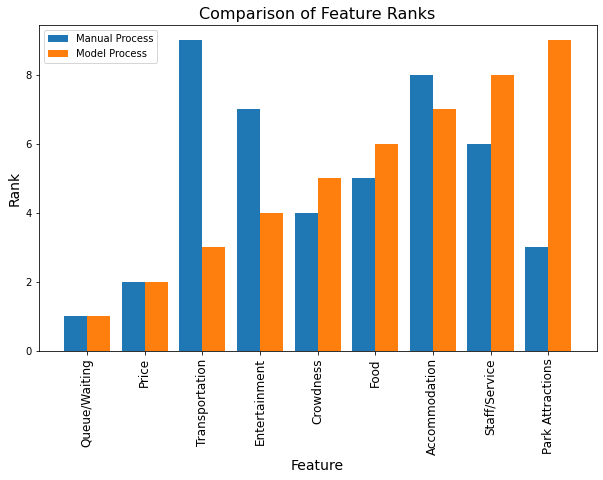

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Create an array for the positions
ind = np.arange(len(rank2))

# Define the width of the bars
width = 0.4

# Adjust rank1_num to match the order of rank2
rank1_num_sorted = [rank1_num[rank1.index(i)] for i in rank2]

# Create a larger figure
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size here

# Create bar plots
bar1 = ax.bar(ind - width/2, rank1_num_sorted, width, label='Manual Process')
bar2 = ax.bar(ind + width/2, ind+1, width, label='Model Process')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Feature', fontsize=14)  
ax.set_ylabel('Rank', fontsize=14)  
ax.set_title('Comparison of Feature Ranks', fontsize=16)  
ax.set_xticks(ind)
ax.set_xticklabels(rank2, rotation=90, fontsize=12)  
ax.legend()

# Show the plot
plt.show()